#Importing Libraries

First, we import the necessary libraries to handle data generation and visualization.

In [ ]:
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

# Setting style for better aesthetics
sns.set_style("whitegrid")

# **1. Probability**


Probability is the measure of the likelihood that an event will occur. It is quantified as a number between 0 (impossible) and 1 (certain).

$$P(A) = \frac{\text{Number of favorable outcomes}}{\text{Total number of possible outcomes}}$$


<br>
We will simulate a coin toss experiment. Theoretically, the probability of heads is 0.5. We will see how the "Empirical Probability" converges to the "Theoretical Probability" as we increase the number of trials (Law of Large Numbers).

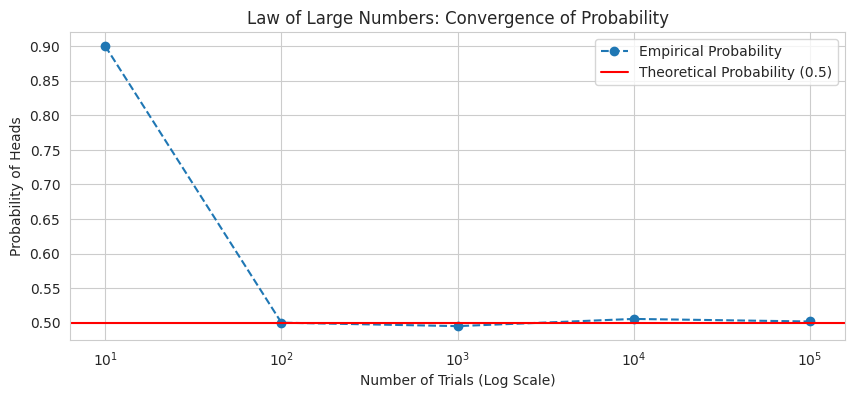

In [ ]:
def simulate_coin_toss(num_trials):
    # 0 is Tails, 1 is Heads
    outcomes = np.random.choice([0, 1], size=num_trials)
    heads_count = np.sum(outcomes)

    prob_heads = heads_count / num_trials
    return prob_heads

# Run simulation with increasing N
trials = [10, 100, 1000, 10000, 100000]
results = [simulate_coin_toss(n) for n in trials]

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(trials, results, marker='o', linestyle='--', label='Empirical Probability')
plt.axhline(0.5, color='r', linestyle='-', label='Theoretical Probability (0.5)')
plt.xscale('log') # Log scale to see the orders of magnitude
plt.xlabel('Number of Trials (Log Scale)')
plt.ylabel('Probability of Heads')
plt.title('Law of Large Numbers: Convergence of Probability')
plt.legend()
plt.show()

# **2. Discrete vs. Continuous Data**


  * **Discrete Data:** Data that can only take certain values (usually integers). You *count* discrete data (e.g., number of students, roll of a die).
  * **Continuous Data:** Data that can take any value within a range. You *measure* continuous data (e.g., height, weight, temperature).

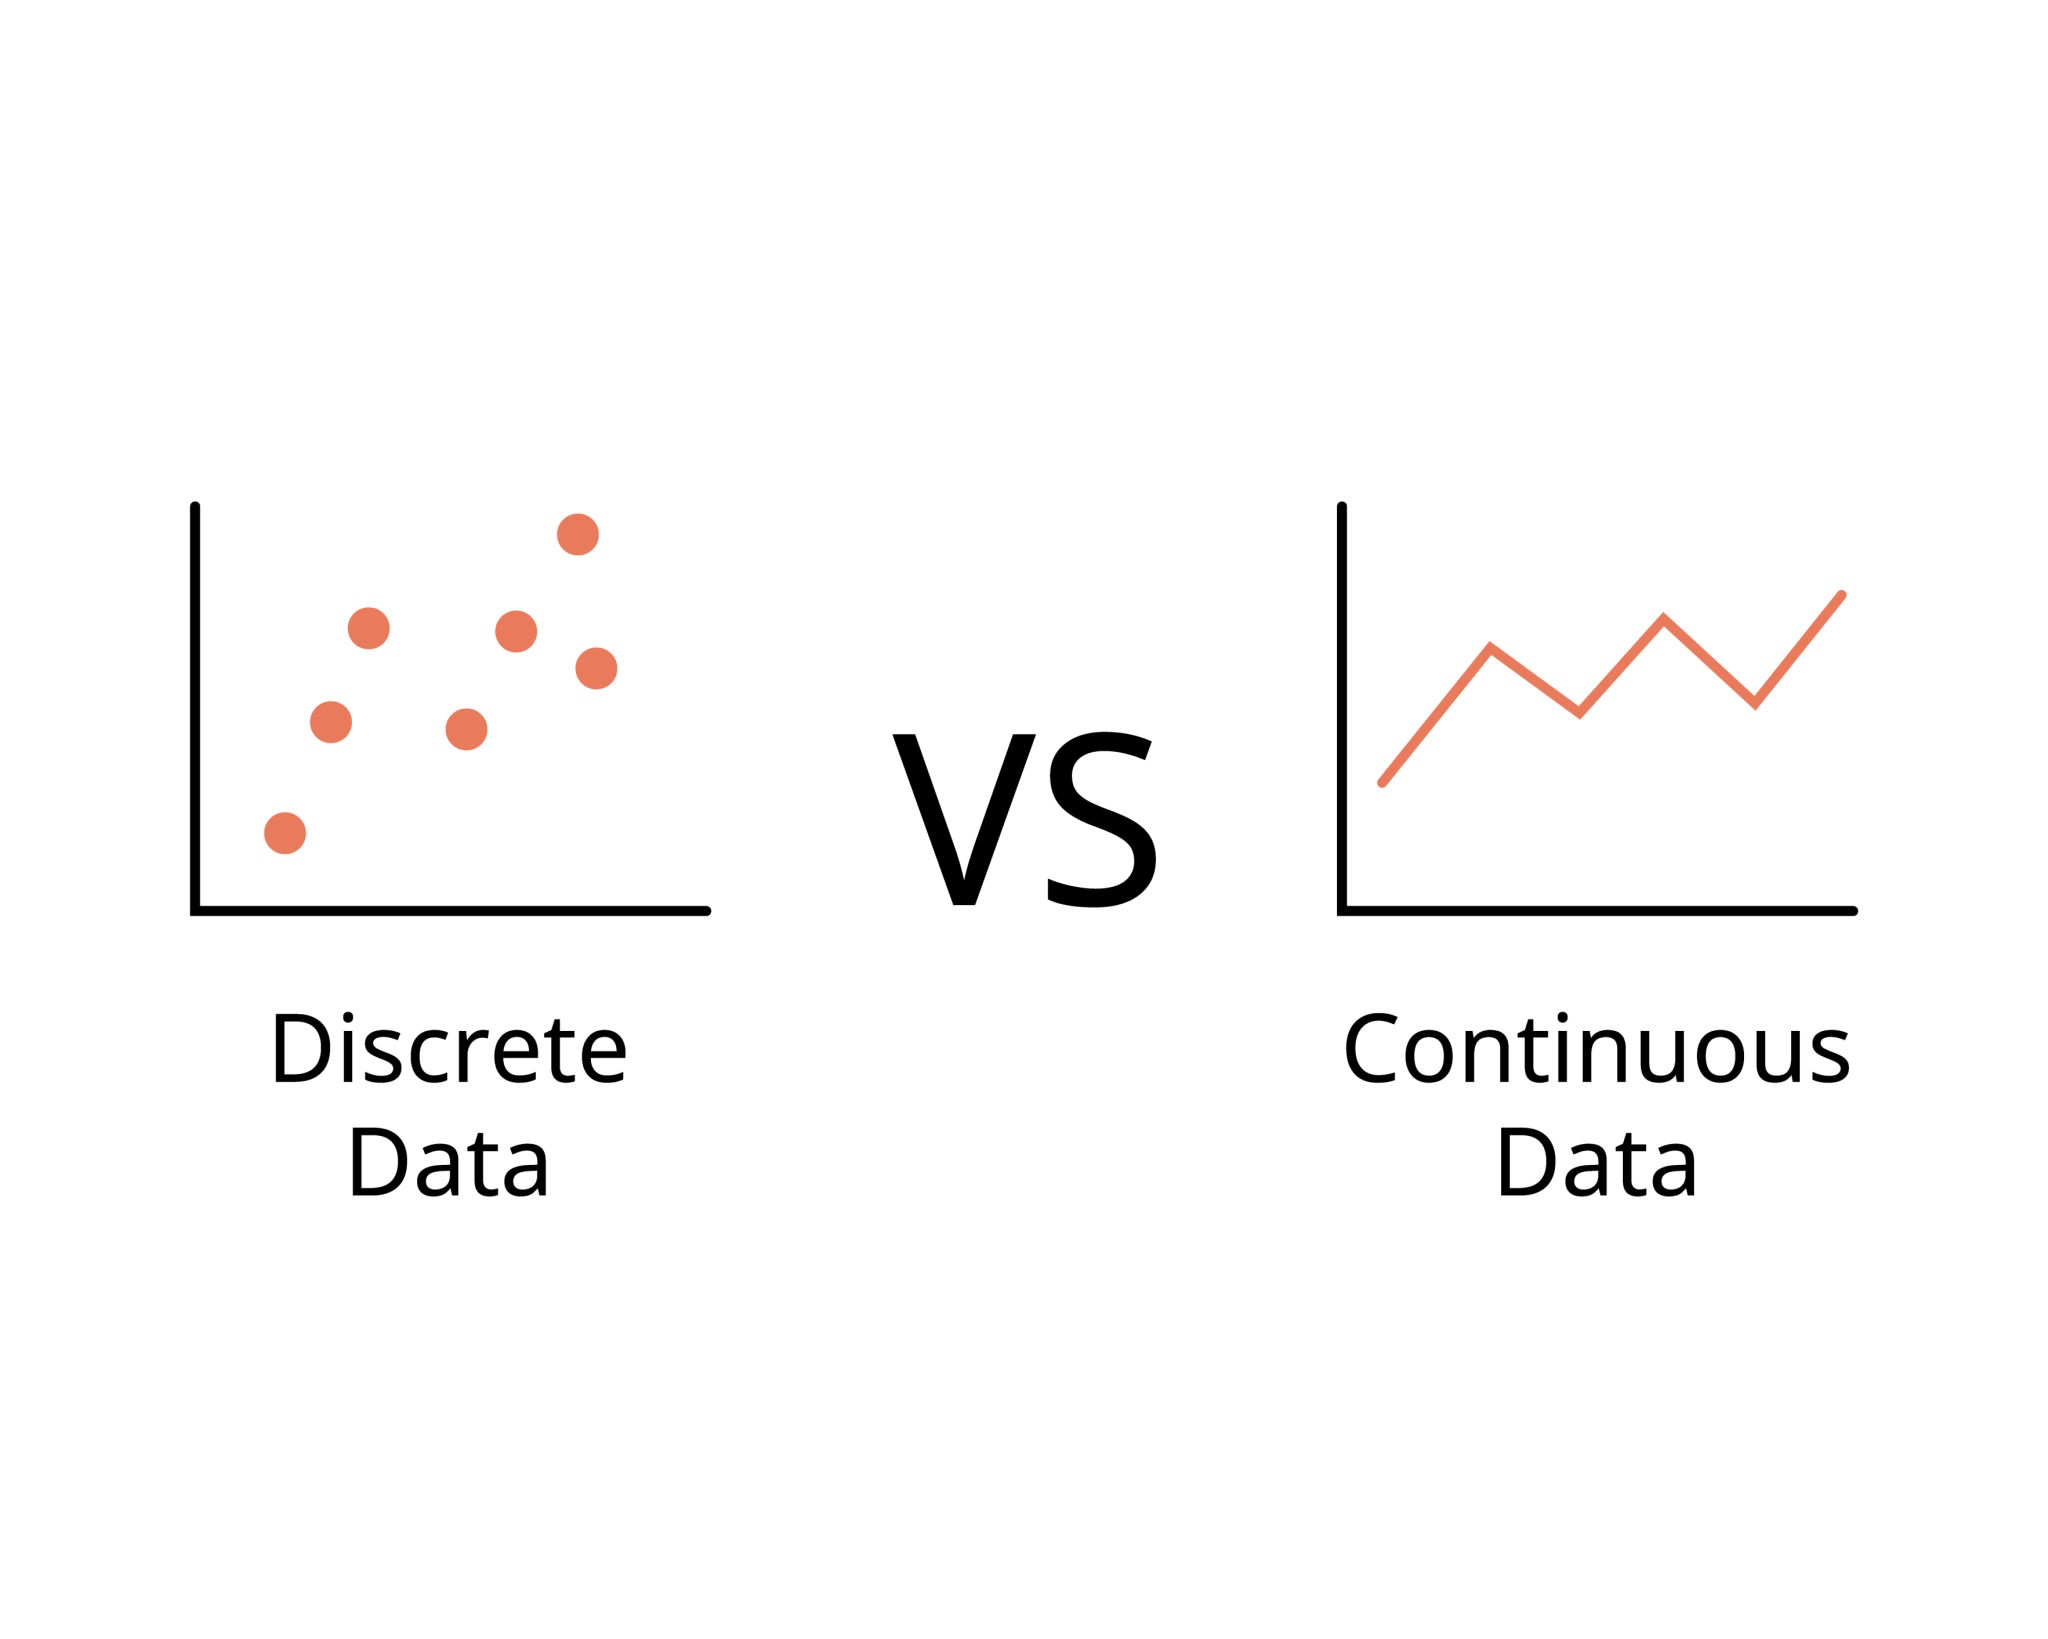


We will visualize this by plotting "Number of Customer Complaints" (Discrete) vs. "Call Duration" (Continuous).

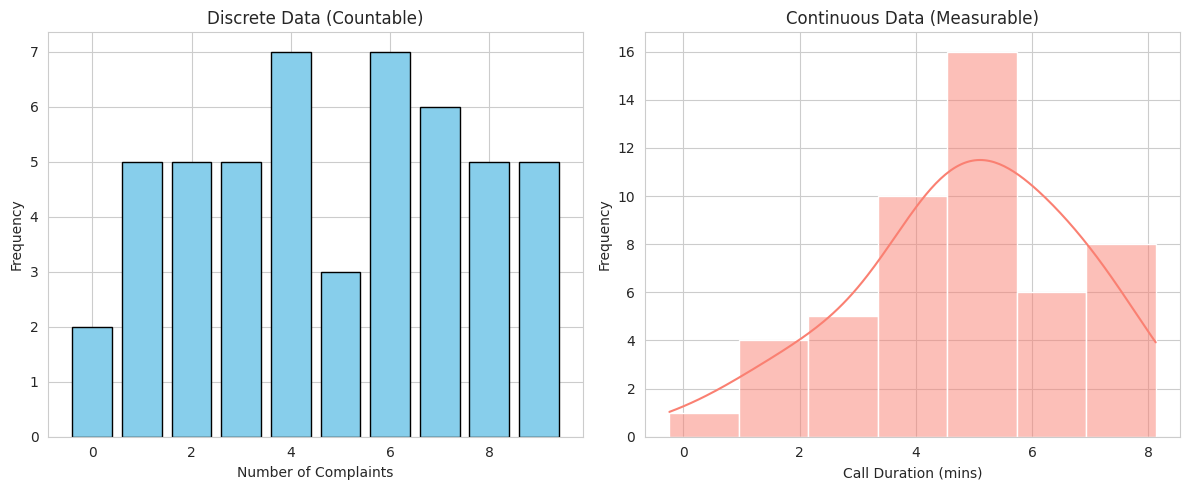

In [ ]:
# Generate Data
np.random.seed(42)

# Discrete: Random integers (e.g., complaints per day)
discrete_data = np.random.randint(0, 10, size=50)

# Continuous: Random floats (e.g., call duration in minutes)
continuous_data = np.random.normal(loc=5, scale=2, size=50)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Discrete Plot (Bar chart emphasizes distinct categories)
axes[0].hist(discrete_data, bins=np.arange(0, 11)-0.5, rwidth=0.8, color='skyblue', edgecolor='black')
axes[0].set_title("Discrete Data (Countable)")
axes[0].set_xlabel("Number of Complaints")
axes[0].set_ylabel("Frequency")

# Continuous Plot (Histogram/KDE emphasizes flow)
sns.histplot(continuous_data, kde=True, ax=axes[1], color='salmon')
axes[1].set_title("Continuous Data (Measurable)")
axes[1].set_xlabel("Call Duration (mins)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# **3. Probability Distributions (Overview)**

A probability distribution is a mathematical function that gives the probabilities of occurrence of different possible outcomes for an experiment.

  * If the data is **Discrete**, we use a **Probability Mass Function (PMF)**.
  * If the data is **Continuous**, we use a **Probability Density Function (PDF)**.



# **4. Probability Mass Function (PMF)**

The PMF gives the probability that a discrete random variable is *exactly* equal to some value.
$$P(X = k)$$



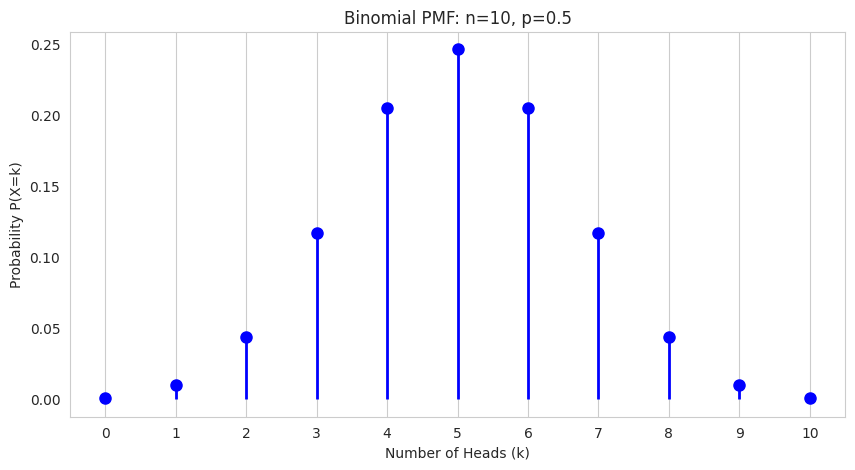

Probability of getting exactly 5 heads: 0.2461


In [ ]:
# Parameters
n = 10  # Number of trials (coin tosses)
p = 0.5 # Probability of success (heads)

# Possible number of heads (0 to 10)
k_values = np.arange(0, n + 1)

# Calculate PMF using Scipy
pmf_values = stats.binom.pmf(k_values, n, p)

# Visualization
plt.figure(figsize=(10, 5))
plt.vlines(k_values, 0, pmf_values, colors='b', linestyles='-', lw=2)
plt.plot(k_values, pmf_values, 'bo', ms=8)
plt.title(f'Binomial PMF: n={n}, p={p}')
plt.xlabel('Number of Heads (k)')
plt.ylabel('Probability P(X=k)')
plt.xticks(k_values)
plt.grid(axis='y')
plt.show()

print(f"Probability of getting exactly 5 heads: {stats.binom.pmf(5, n, p):.4f}")

# **5. Probability Density Function (PDF)**

For continuous variables, the probability of taking on any *exact* single value is 0 (because there are infinite decimal values). Instead, the PDF specifies the probability per unit of random variable. The area under the curve represents the probability.



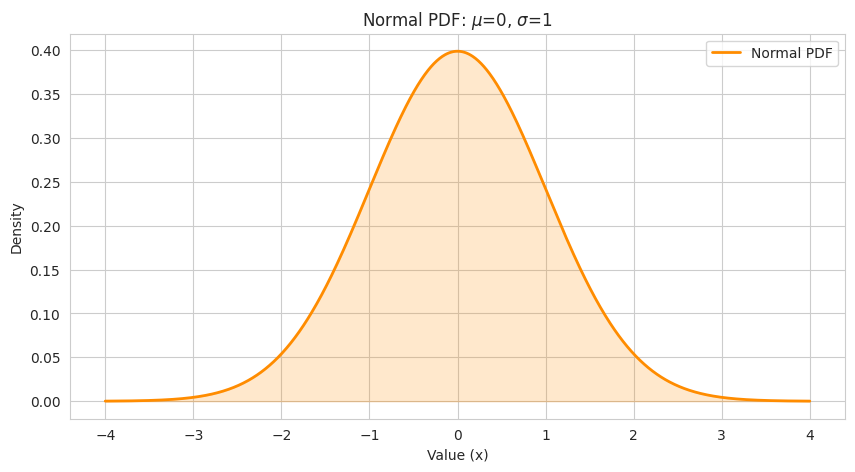

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Parameters
mu = 0      # Mean
sigma = 1   # Standard Deviation

# Generate continuous x values
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Calculate PDF
pdf_values = stats.norm.pdf(x, mu, sigma)

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(x, pdf_values, color='darkorange', lw=2, label='Normal PDF')
plt.fill_between(x, pdf_values, alpha=0.2, color='darkorange') # The area is probability

plt.title(rf'Normal PDF: $\mu$={mu}, $\sigma$={sigma}')
plt.xlabel('Value (x)')
plt.ylabel('Density')
plt.legend()
plt.show()

-----

### **6. Cumulative Distribution Function (CDF)**


The CDF applies to both discrete and continuous variables. It gives the probability that the random variable $X$ will take a value **less than or equal to** $x$.
$$F(x) = P(X \le x)$$

Notice how it starts at 0 and approaches 1.

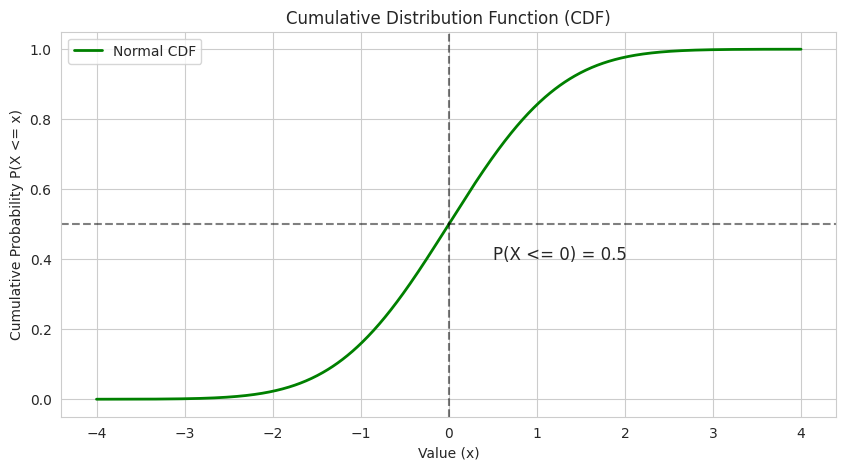

In [ ]:
# Calculate CDF using the same x values from the PDF section
cdf_values = stats.norm.cdf(x, mu, sigma)

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(x, cdf_values, color='green', lw=2, label='Normal CDF')

# Highlight a specific point (e.g., x=0)
plt.axvline(0, color='k', linestyle='--', alpha=0.5)
plt.axhline(0.5, color='k', linestyle='--', alpha=0.5)
plt.text(0.5, 0.4, 'P(X <= 0) = 0.5', fontsize=12)

plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Value (x)')
plt.ylabel('Cumulative Probability P(X <= x)')
plt.legend()
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (10, 6)

# 7\. Bernoulli Distribution

The building block of many distributions. It represents a single experiment with exactly two possible outcomes: "Success" (1) or "Failure" (0).

  * **Parameter:** $p$ (probability of success).
  * **Probability Mass Function (PMF):**
    $$P(X=k) = p^k(1-p)^{1-k} \quad \text{for } k \in \{0,1\}$$

**Real-world example:** A single coin toss (Heads=1, Tails=0).

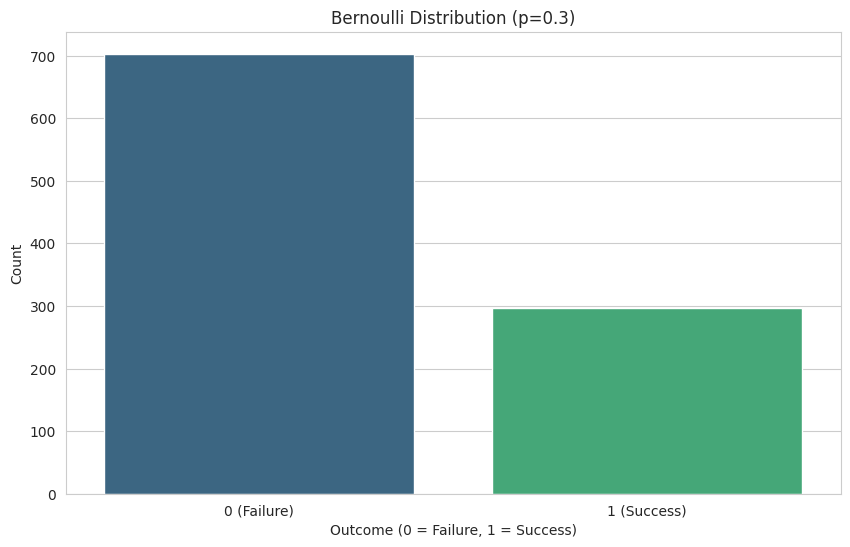

In [ ]:
def plot_bernoulli(p=0.5, size=1000):
    # Generate data
    data = stats.bernoulli.rvs(p, size=size)

    # Plot
    plt.figure()
    sns.countplot(x=data, palette='viridis', hue=data, legend=False)
    plt.title(f"Bernoulli Distribution (p={p})")
    plt.xlabel("Outcome (0 = Failure, 1 = Success)")
    plt.ylabel("Count")
    plt.xticks([0, 1], ['0 (Failure)', '1 (Success)'])
    plt.show()

# Simulate a biased coin where success probability is 0.3
plot_bernoulli(p=0.3)

# 8\. Binomial Distribution

The Binomial distribution is essentially the sum of $n$ independent Bernoulli trials. It asks: "In $n$ trials, how many times did we succeed?"

  * **Parameters:** $n$ (number of trials), $p$ (probability of success).
  * **Probability Mass Function (PMF):**
    $$P(X=k) = \binom{n}{k} p^k (1-p)^{n-k}$$

**Real-world example:** Flipping a coin 10 times and counting how many times it lands on heads.

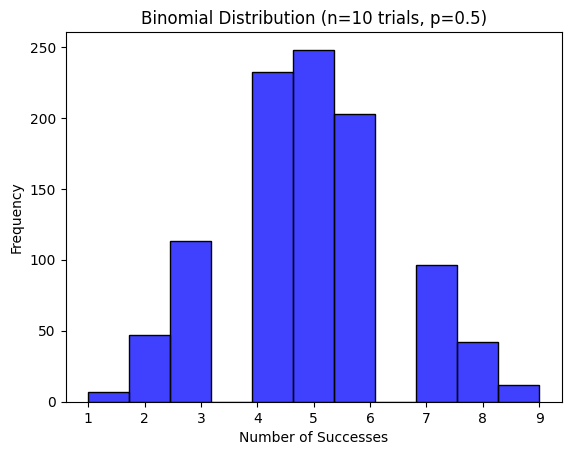

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_binomial(n=10, p=0.5, size=1000):
    # Generate data
    data = np.random.binomial(n=n, p=p, size=size)

    # Plot
    plt.figure()
    sns.histplot(data, kde=False, color='blue', bins=n+1)
    plt.title(f"Binomial Distribution (n={n} trials, p={p})")
    plt.xlabel("Number of Successes")
    plt.ylabel("Frequency")
    plt.show()

# Simulate flipping a fair coin 10 times, repeated 1000 times
plot_binomial(n=10, p=0.5)

# 9\. Poisson Distribution

This models the number of events occurring within a fixed interval of time or space. It is used when we know the average rate of events, but the exact timing is random.

  * **Parameter:** $\lambda$ (lambda) = average rate of occurrence.
  * **Probability Mass Function (PMF):**
    $$P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!}$$

**Real-world example:** The number of emails you receive in an hour, or the number of cars passing a traffic light in a minute.

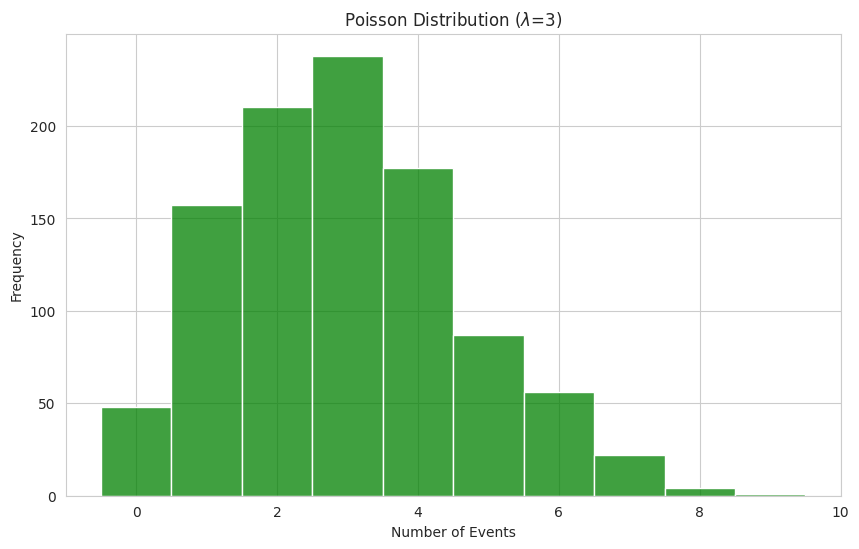

In [ ]:
def plot_poisson(lam=3, size=1000):
    # Generate data
    data = np.random.poisson(lam=lam, size=size)

    # Plot
    plt.figure()
    sns.histplot(data, kde=False, color='green', discrete=True)
    plt.title(f"Poisson Distribution ($\\lambda$={lam})")
    plt.xlabel("Number of Events")
    plt.ylabel("Frequency")
    plt.show()

# Simulate a call center receiving an average of 3 calls per minute
plot_poisson(lam=3)

# 10\. Uniform Distribution (Continuous)

In a uniform distribution, every outcome in a specific range $[a, b]$ is equally likely. The "height" of the distribution is constant.

  * **Parameters:** $a$ (minimum), $b$ (maximum).
  * **Probability Density Function (PDF):**
    $$f(x) = \frac{1}{b-a} \quad \text{for } a \le x \le b$$

**Real-world example:** A random number generator picking a number between 0 and 1.

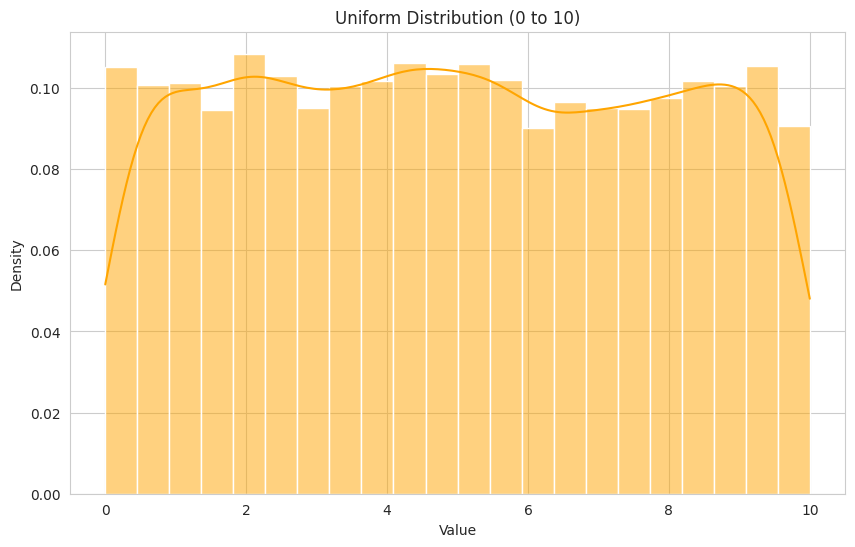

In [ ]:
def plot_uniform(a=0, b=10, size=10000):
    # Generate data
    data = np.random.uniform(a, b, size)

    # Plot
    plt.figure()
    sns.histplot(data, kde=True, color='orange', stat="density")
    plt.title(f"Uniform Distribution ({a} to {b})")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.show()

# Simulate picking a random number between 0 and 10
plot_uniform(a=0, b=10)

# 11\. Normal (Gaussian) Distribution

The famous "Bell Curve." Most data points cluster around the mean, and tails taper off symmetrically. It is crucial because of the Central Limit Theorem.

  * **Parameters:** $\mu$ (mean), $\sigma$ (standard deviation).
  * **Probability Density Function (PDF):**
    $$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$

**Real-world example:** Heights of people, blood pressure readings, or errors in measurement.

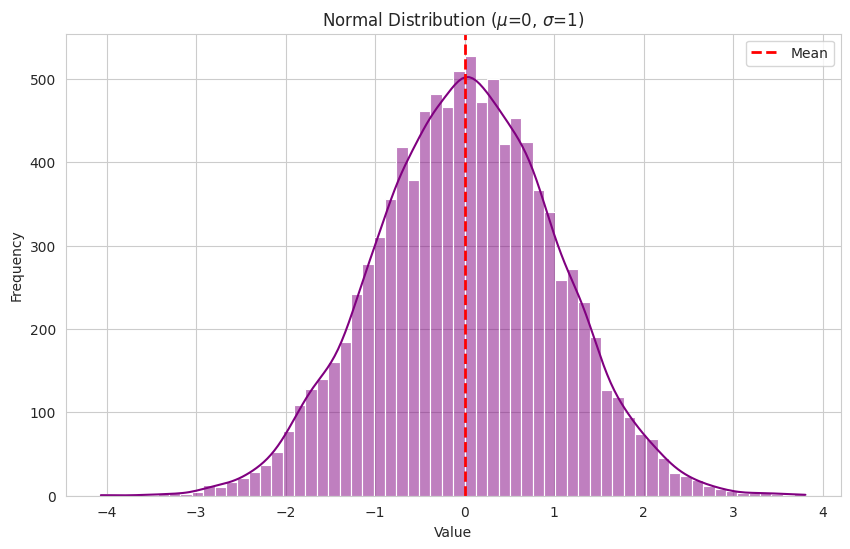

In [ ]:
def plot_normal(mu=0, sigma=1, size=10000):
    # Generate data
    data = np.random.normal(loc=mu, scale=sigma, size=size)

    # Plot
    plt.figure()
    sns.histplot(data, kde=True, color='purple')

    # Add vertical line for mean
    plt.axvline(mu, color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.title(f"Normal Distribution ($\\mu$={mu}, $\\sigma$={sigma})")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Simulate data with mean 0 and standard deviation 1
plot_normal(mu=0, sigma=1)